# Table of Contents

[Introduction](#1)

[Find and remove duplicate values](#2)

[Find and remove missing values](#3)

[[A] Easy (must complete all to pass)](#4)

[[B] Medium (must complete all to pass)](#5)

[[C] Hard (must complete at least two to pass)](#6)

[Conclusion](#7)

# Introduction <a id = 1></a>

In this project, I analyze a dataset of the grocery delivery platform Instacart, which is modified from a dataset that was publicly released by Instacart in 2017. The purpose of the analysis is to give stakeholders insight into the shopping habits of Instacart customers. After cleaning the data of duplicates and missing values, I answer questions regarding, among other things, the hour of day customers tend to shop, the day of the week they tend to shop, how many days it takes for them to go shopping again, which products are most frequently ordered, how often customers reorder particular products, and how many products customers tend to buy. 
    
There are five tables in the dataset:

(1) `instacart_orders`, where each row corresponds to one order on the Instacart app.

(2) `products`, where each row corresponds to a unique product that customers can buy.

(3) `order_products`, where each row corresponds to one item placed in an order.

(4) `aisles`, which contains the names and ID numbers of the grocery aisle categories.

(5) `departments`, which contains the names and ID numbers of the grocery department categories.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

All five of the data files for this project have the same nonstandard formatting, which consists of all the data entries being connected together using semicolons. Hence, the **sep = ';'** argument is needed with the **pd.read_csv** function.

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
products = pd.read_csv('/datasets/products.csv', sep = ';')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Notice that **order_products.info()** has the argument **show_counts = True**. This argument should be considered to be included whenever a DataFrame has an especially large number of rows, otherwise info() might not print the non-null value counts.

# Find and remove duplicate values <a id = 2></a>

`orders` **DataFrame**

The line below finds that the number of duplicated rows in this DataFrame is 15. This is useful to know because after I drop the duplicates there should be 15 fewer rows in total.

In [7]:
display(instacart_orders[instacart_orders.duplicated()])

print('Number of duplicated rows:', len(instacart_orders[instacart_orders.duplicated()]))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Number of duplicated rows: 15


I noticed that **ALL** of the duplicated orders took place on Wednesday at 2:00 AM. There are 121 rows of orders that fit this filtering criteria, so after I drop the duplicates there should only be 121 – 15 = 106 rows left.

In [8]:
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


The line below redefines the DataFrame by removing the 15 rows of duplicates. 

In [9]:
instacart_orders = instacart_orders.drop_duplicates().reset_index()

In [10]:
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

,index,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,4838,2766110,162084,41,3,2,16.0
5156,5156,2190225,138285,18,3,2,11.0
15506,15506,553049,58599,13,3,2,7.0
18420,18420,382357,120200,19,3,2,11.0
24691,24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...,...
456998,457013,3384021,14881,6,3,2,30.0
458801,458816,910166,164782,18,3,2,4.0
459620,459635,1680532,106435,6,3,2,21.0
468309,468324,222962,54979,59,3,2,3.0


As expected, there are now only 106 rows of orders that took place on Wednesday at 2:00 AM. The above result assures me that the duplicates have been successfully dropped.

Now let's double check for duplicate order IDs only. The line of code below displays an empty DataFrame, which confirms that the duplicates have been dropped. The argument **subset = 'order_id'** makes sense to use because if any two (or more) orders <u>STILL</u> had the same order_id number, that would mean there are still duplicated orders in the DataFrame.

In [11]:
instacart_orders[instacart_orders.duplicated(subset = 'order_id')]

,index,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


`products` **DataFrame**

Let's see if this dataframe has any exact duplicate rows.

In [12]:
products[products.duplicated()]

,product_id,product_name,aisle_id,department_id


Since the above line of code displays an empty DataFrame, there are no obvious duplicates. More filtering needs to be done, however, because there might be some implicit duplicates.

I wonder if there are any duplicate product IDs.

In [13]:
products[products.duplicated(subset = 'product_id')]

,product_id,product_name,aisle_id,department_id


Since this DataFrame is empty, there are no implicit duplicates where the same product ID number is used more than once.

Now let's check for duplicate product names. It makes sense to convert all of the product names to lowercase because it is possible that, for example, "high performance energy drink" appears in one row and "High Performance Energy Drink" appears in another row, which is problematic because the same product should not be mentioned in more than one row.

In [14]:
products['product_name'] = products['product_name'].str.lower()
products[products.duplicated(subset = 'product_name')]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


The next line of code shows that there are 104 duplicated product names. These rows will <u>NOT</u> be dropped, however, because earlier I showed that none of the product ID numbers are duplicated, hence any duplicated product name almost certainly means that there are two or more brands of the same product.

In [15]:
products[products.duplicated(subset = 'product_name')].dropna()

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


`departments` **DataFrame**

Since the departments DataFrame has only 21 rows, it is reasonable to display the whole DataFrame and scan with my eyes to see if there are any duplicates. The department IDs are listed in ascending order, which makes it <u>VERY</u> easy to see that there are no duplicated department IDs.

In [16]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


The following line sorts the department names in alphabetical order, thereby making it <u>VERY</u> easy to see that none of the department names are duplicated.

In [17]:
departments.sort_values('department')

,department_id,department
4,5,alcohol
17,18,babies
2,3,bakery
6,7,beverages
13,14,breakfast
9,10,bulk
14,15,canned goods
15,16,dairy eggs
19,20,deli
8,9,dry goods pasta


`aisles` **DataFrame**

The following line confirms that none of the aisle ID numbers are duplicated.

In [18]:
aisles[aisles.duplicated(subset = 'aisle_id')]

,aisle_id,aisle


The following line confirms that none of the aisle names are duplicated.

In [19]:
aisles['aisle'] = aisles['aisle'].str.lower()
aisles[aisles.duplicated(subset = 'aisle')]

,aisle_id,aisle


`order_products` **DataFrame**

The following line confirms that this dataframe has no exact duplicate rows.

In [20]:
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


I wonder if there are any "tricky" duplicates.

It would not make sense to search for only duplicated order IDs because it is possible that within the same order multiple products were purchased, and hence two or more rows with the same order ID will probably have different product IDs, meaning such rows are <u>NOT</u> duplicates.

It also would not make sense to search for duplicated product IDs because the same product might appear in multiple rows with distinctly different order IDs. However, it does make sense to search for "tricky" duplicates by trying to find rows where the order ID <u>AND</u> the product ID are duplicated.

The next line of code displays an empty DataFrame, so I find no evidence that there exist any "tricky" duplicates in **order_products**.

In [21]:
order_products[order_products.duplicated(subset = ['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


# Find and remove missing values <a id = 3></a>

`products` **DataFrame**

Are all of the missing product names associated with aisle ID 100?

To help me answer the above question, I first display the rows of the DataFrame with null values. It turns out there are 1258 such rows in the DataFrame, which makes sense because using info() in the beginning revealed that there are 49694 rows in the DataFrame in total, and **product_name** is the only column with missing values, specifically 49694 – 48436 = 1258 of them.

In [22]:
null_product_name = products[(products['product_name'].isnull())]
display(null_product_name)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Next, I display the DataFrame below which is filtered to find the rows with null values <u>AND</u> an aisle ID of 100. Just like the filtered DataFrame from above, this other filtered DataFrame has 1258 rows, which is only possible if the two DataFrames are actually the same.

In [23]:
aisle_id_100_and_null_product_name = products[(products['aisle_id'] == 100) & (products['product_name'].isnull())]
display(aisle_id_100_and_null_product_name)

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


<b>ANSWER:</b> Yes, it must be true that all of the missing product names are associated with aisle ID 100!

The following line isn't required, but I think it is a nice alternative way to verify that the two DataFrames made above are equal.

In [24]:
print(null_product_name.equals(aisle_id_100_and_null_product_name))

True


Are all of the missing product names associated with department ID 21?

In [25]:
aisle_id_100_and_null_product_name.equals(products[(products['department_id'] == 21)])

True

<b>ANSWER:</b> Since the line of code above outputs "True", then the answer is <u>YES</u>, all of the missing product names are associated with department ID 21.

What is this ailse and department?

In [26]:
display(aisles[aisles['aisle_id'] == 100])
display(departments[departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


<b>ANSWER:</b> Both the aisle and department are named "missing".

Let's fill the missing product names with 'Unknown'.

In [27]:
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Unlike in the beginning, if I call info() on **products** now, I can see that the column **product_name** no longer has any missing values.

`instacart_orders` **DataFrame**

Are there any missing values where it's not a customer's first order?

In [28]:
instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] != 1)]

,index,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


**ANSWER:** Since the above code displays an empty DataFrame, that means the answer is <u>NO</u>, there are no missing **days_since_prior_order** values where it's not the customer's first order.

`order_products` **DataFrame**

What are the min and max values in this column?

In [29]:
order_products['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

**ANSWER:** The minimum value of the 'add_to_cart_order' column is 1, whereas the maximum is 64.

Save all the order IDs with at least one missing value in **add_to_cart_order** column in a new dataframe.

In [30]:
ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

Do all orders with missing values have more than 64 products?

In [31]:
order_products_filtered_by_ids = order_products[order_products['order_id'].isin(ids)]

product_count = order_products_filtered_by_ids.groupby('order_id').count()

product_count = product_count.rename(columns = {'product_id': 'number_of_products'})

display(product_count['number_of_products'])

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: number_of_products, Length: 70, dtype: int64

In [32]:
display(product_count[product_count['number_of_products'] <= 64]['number_of_products'])

Series([], Name: number_of_products, dtype: int64)

<b>ANSWER:</b> Yes, all of the orders with at least one missing **add_to_cart_order** value have more than 64 products in total, as evidenced by how the line of code above, which attempts to find orders with less than or equal to 64 products, displays an empty DataFrame.

In [33]:
display(product_count['number_of_products'].sort_values())

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: number_of_products, Length: 70, dtype: int64

Indeed, 65 is the minimum number of products in orders that have at least one missing **add_to_cart_order** value.

Replace the missing values with 999, and convert the column to integer type.

In [34]:
order_products = order_products.fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass) <a id = 4></a>

[A1] Verify that the `'order_hour_of_day'` & `'order_dow'` values in the `instacart_orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6).

In [35]:
display(instacart_orders[['order_hour_of_day', 'order_dow']].describe())

,order_hour_of_day,order_dow
count,478952.000000,478952.000000
mean,13.447034,2.775051
std,4.224567,2.045901
min,0.000000,0.000000
25%,10.000000,1.000000
50%,13.000000,3.000000
75%,16.000000,5.000000
max,23.000000,6.000000


By using the describe( ) function, I am able to view the min and max values of the `order_hour_of_day` and `order_dow` columns. 
    
This helps me verify that the `order_hour_of_day` values range from 0 to 23, and that the `order_dow` values range from 0 to 6.
    
It is sensible for the `order_hour_of_day` values to range from 0 to 23 because there are 24 hours in a day, and this range covers every possible hour. For example, `order_hour_of_day` == 0 represents the range of time from 0:00 to 0:59 (alternatively, 12:00 am to 12:59 am) while `order_hour_of_day` == 23 represents from 23:00 to 23:59 (alternatively, 11 pm to 11:59 pm).
    
It is sensible for the `order_dow` values to range from 0 to 6 because dow is an abbreviation for "day of the week", there are seven days in a week, and there are seven integers in the number range 0 to 6 (inclusive). 0 stands for Sunday, 1 stands for Monday, 2 stands for Tuesday, etc.

[A2] What time of day do people shop for groceries?

,order_hour_of_day
count,478952.000000
mean,13.447034
std,4.224567
min,0.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


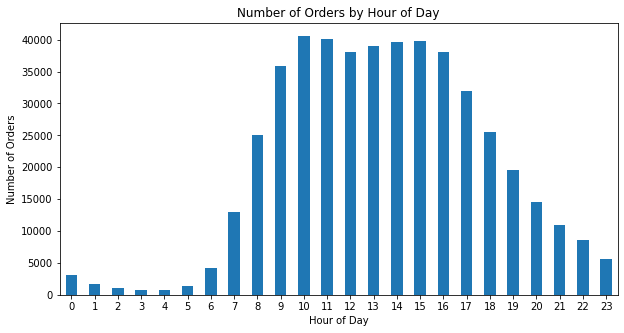

In [36]:
display(instacart_orders[['order_hour_of_day']].describe())

hour_of_day_count = instacart_orders[['order_id', 'order_hour_of_day']].groupby('order_hour_of_day').count()

hour_of_day_count = hour_of_day_count.reset_index()

hour_of_day_count.plot(kind = 'bar', 
                       x = 'order_hour_of_day',
                       y = 'order_id',
                       title = 'Number of Orders by Hour of Day',
                       xlabel = 'Hour of Day',
                       ylabel = 'Number of Orders',
                       figsize = (10, 5), 
                       legend = None)

plt.xticks(rotation = 0)
plt.show()

People shop for groceries all throughout the day, however it is worth noting that 50% of them place their orders before 13:00 (alternatively, 1:00 pm) and the other half after 13:00 (1:00 pm) but before 23:59 (11:59 pm). This implies that there is a slight majority in favor of placing orders in the second half of the 24-hour day compared to the first half. Furthermore, the middle 50% of people place their orders between 10:00 (am) and 16:59 (4:59 pm), as determined by the 25th and 75th percentile values.
    
Also worth noting is that the most common hour for ordering groceries is from 10:00 (am) to 10:59 (am) whereas the least common hour is from 4:00 (am) to 4:59 (am). Finally, the top 12 hours of day include all of the integers from 8 to 19, inclusive. 413090 / 478967 * 100% ≈ 86.25% of orders are placed between these 12 hours.

[A3] What day of the week do people shop for groceries?

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
dtype: int64

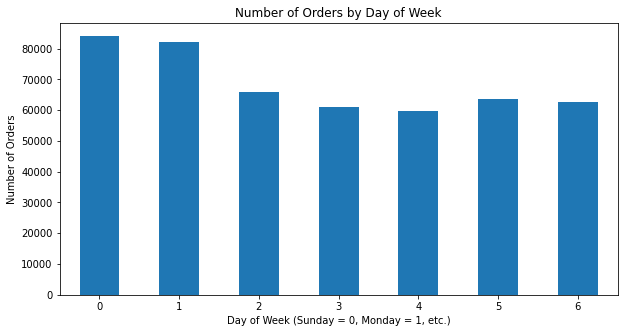

In [37]:
display(instacart_orders.value_counts('order_dow'))

order_dow_count = instacart_orders[['order_id', 'order_dow']].groupby('order_dow').count()

order_dow_count = order_dow_count.reset_index()

order_dow_count.plot(kind = 'bar', 
                     x = 'order_dow',
                     y = 'order_id',
                     title = 'Number of Orders by Day of Week',
                     xlabel = 'Day of Week (Sunday = 0, Monday = 1, etc.)',
                     ylabel = 'Number of Orders',
                     figsize = (10, 5), 
                     legend = None)

plt.xticks(rotation = 0)
plt.show()

Though grocery shopping occurs on all seven days of the week, the most common day in Sunday, followed closely by Monday. The least common day for grocery shopping is Thursday, with Wednesday being a close second least common day. It is worth noting that Sunday and Monday are the only days of the week with over 80,000 occurrences of grocery shopping. The third most common day, Tuesday, has 65,833 occurrences, which is a <u>BIG</u> decrease compared to 84,090 (Sunday) and 82,185 (Monday).

[A4] How long do people wait until placing another order?

,days_since_prior_order
count,450135.000000
mean,11.101814
std,9.190004
min,0.000000
25%,4.000000
50%,7.000000
75%,15.000000
max,30.000000


days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
dtype: int64

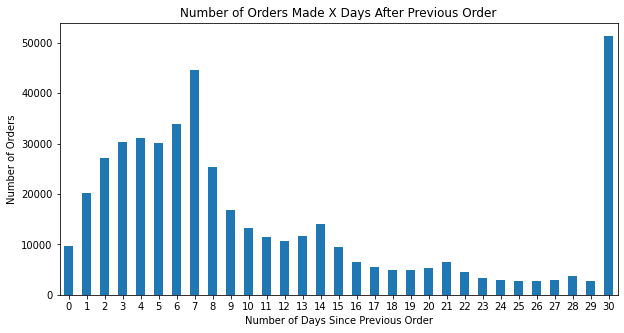

In [38]:
display(instacart_orders[['days_since_prior_order']].describe())

display(instacart_orders.value_counts('days_since_prior_order'))

days_since_prior_order_count = instacart_orders.groupby('days_since_prior_order').count()

days_since_prior_order_count = days_since_prior_order_count.reset_index()

days_since_prior_order_count = days_since_prior_order_count.rename(columns = {'index': 'number_of_orders'})

days_since_prior_order_count['days_since_prior_order'] = days_since_prior_order_count['days_since_prior_order'].astype(int)

days_since_prior_order_count.plot(kind = 'bar', 
                                  x = 'days_since_prior_order',
                                  y = 'number_of_orders',
                                  title = 'Number of Orders Made X Days After Previous Order',
                                  xlabel = 'Number of Days Since Previous Order',
                                  ylabel = 'Number of Orders',
                                  legend = None,
                                  figsize = (10, 5))

plt.xticks(rotation = 0)
plt.show()

The median number of days people wait until placing another order is 7 days, meaning half of the people in this data set place a new order within one week after the previous order. On the flip side, half of the people place a new order between one week and thirty days after the previous order. 
    
Additionally, the 75th percentile `days_since_prior_order` value is 15, meaning the majority of new orders, specifically 75% of them, are made within half a month after the previous order. 
    
Worth noting is that the most common `days_since_prior_order` value is 30, with 51,337 occurrences. The second most common `days_since_prior_order` value is 7, which has much fewer occurrences, 44,577. There is an even bigger "gap" between second place and third place, with the `days_since_prior_order` value of 6 having 33,930 occurrences. 
    
30 being the modal value can possibly be explained by the fact that some people deliberately go grocery shopping only once a month and buy many products in bulk. 30 being the modal value also explains why the mean value, approximately 11, is much larger than the median value. Since mean values are highly influenced by outliers, in this dataset it is more appropriate to use the percentile values as representative values.

# [B] Medium (must complete all to pass) <a id = 5></a>

[B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? 

Plot a bar graph for both days and describe the differences that you see.

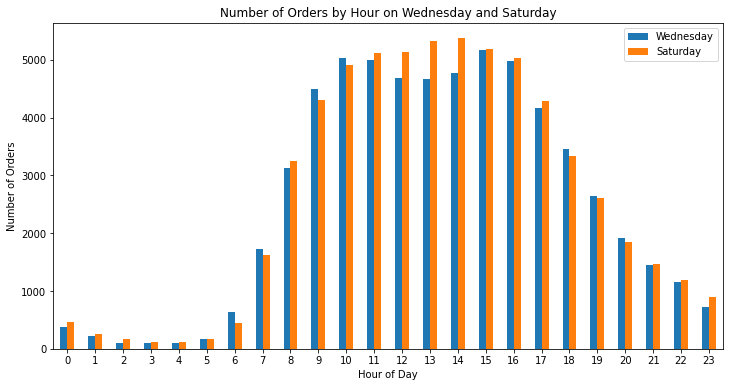

In [39]:
wednesday_data = instacart_orders[instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts(sort = False)
saturday_data = instacart_orders[instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts(sort = False)

wed_sat_data = pd.concat([wednesday_data, saturday_data], axis = 'columns')
wed_sat_data.columns = ['wednesday_orders', 'saturday_orders']

wed_sat_data.plot(kind = 'bar', 
                  y = ['wednesday_orders', 'saturday_orders'],
                  title = 'Number of Orders by Hour on Wednesday and Saturday',
                  xlabel = 'Hour of Day',
                  ylabel = 'Number of Orders',
                  figsize = (12, 6))

plt.legend(['Wednesday', 'Saturday'])
plt.xticks(rotation = 0)
plt.show()

There is little difference between the `order_hour_of_day` distributions for Wednesday and Saturday. 
    
Both distributions have a low number of orders until a dramatic increase in orders beginning at hour 6. 
    
In both distributions, the number of orders peak between hours 10 and 16 before decreasing by a lot in each remaining hour in the 24-hour day.

[B2] What's the distribution for the number of orders per customer?

In [40]:
order_numbers = instacart_orders['order_number'].value_counts(sort = False)
order_numbers = order_numbers.reset_index()
order_numbers = order_numbers.rename(columns = {'index': 'number_of_orders', 'order_number': 'frequency'})

display(order_numbers)
# I display this DataFrame to assure me that I have the correct data for plotting the distribution.

,number_of_orders,frequency
0,1,28817
1,2,28633
2,3,28685
3,4,28703
4,5,25661
...,...,...
95,96,220
96,97,221
97,98,191
98,99,169


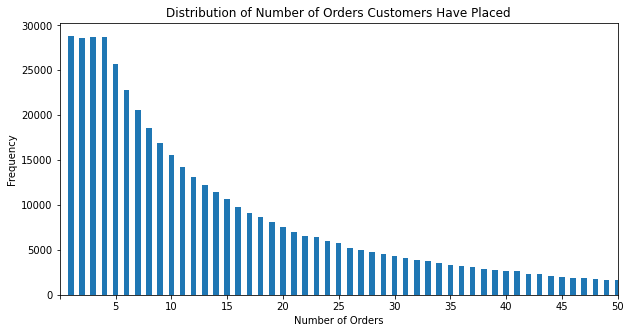

In [41]:
order_numbers.plot(kind = 'bar', 
                   x = 'number_of_orders',
                   y = 'frequency',
                   title = 'Distribution of Number of Orders Customers Have Placed',
                   xlabel = 'Number of Orders',
                   ylabel = 'Frequency',
                   legend = None,
                   figsize = (10, 5))

plt.xticks(rotation = 0)
plt.xticks([-1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99])
plt.show(plt.xlim(-1, 49))

The distribution for the number of orders per customer is right-tailed. In other words, the vast majority of people in this data have only placed a small number of orders on the Instacart app, as viewable at the beginning of the graph. The Number of Orders values 1, 2, 3, and 4 have the highest Frequencies, and starting with 5 the Frequencies are almost always lower than that of the previous Number of Orders value. It is possible that an exponential decay function could be used to model the dramatic decrease in the frequencies of number of orders placed, but more code would need to be written to confirm this hypothesis.

[B3] What are the top 20 popular products (display their id and name)?

In [42]:
top_20_count = order_products.merge(products, on = 'product_id')

top_20_count = top_20_count.groupby(['product_id', 'product_name'])

top_20_count = top_20_count['order_id'].count().reset_index()

top_20_count = top_20_count.sort_values('order_id', ascending=False).head(20)

top_20_count = top_20_count.reset_index(drop = True)

top_20_count = top_20_count.rename(columns = {"order_id": "how_many_purchased"})

display(top_20_count)

,product_id,product_name,how_many_purchased
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


# [C] Hard (must complete at least two to pass) <a id = 6></a>

[C1] How many items do people typically buy in one order? What does the distribution look like?

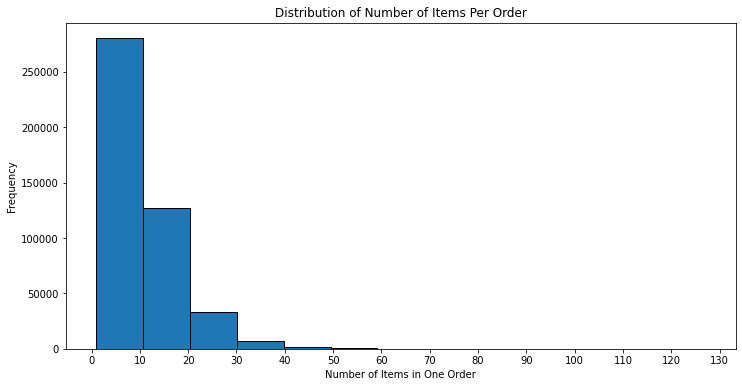

In [43]:
order_and_product_id = order_products[['order_id', 'product_id']]

items_per_order = order_and_product_id.groupby('order_id').count()

items_per_order.plot(kind = 'hist',
                     bins = 13,
                     title = 'Distribution of Number of Items Per Order',
                     figsize = (12, 6),
                     legend = None,
                     edgecolor = 'black')

plt.xlabel('Number of Items in One Order')
plt.xticks(np.arange(0, 140, step = 10))
plt.show()

If you were to categorize the possible number of items in an order into bins of 10 consecutive integers (e.g. 0 to 10, 10 to 20, 20 to 30, etc.), like what I did with the histogram above, you would see that it is most common, by far, for people to only order between 1 and 10 items (notice I wrote "1 and 10" because 0 items doesn't make sense in this context). In second place is ordering between 10 and 20 items, which occurs less than half as often as ordering between 1 and 10 items. As the Number of Items in One Order increases, the frequency of that number of items being in one order decreases, dramatically. In short, this is a right-tailed distribution.

[C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [44]:
reorder = order_products[['product_id', 'reordered']]

reorder = reorder[reorder['reordered'] == 1]

reorder = reorder.merge(products, on = 'product_id')

reorder_count = reorder.groupby(['product_id', 'product_name']).count()

reorder_count = reorder_count.sort_values('reordered', ascending = False)

reorder_count = reorder_count.reset_index()

reorder_count = reorder_count.rename(columns = {'reordered': 'reordered_count'})

reorder_count = reorder_count.drop(columns = {'aisle_id', 'department_id'})

display(reorder_count.head(20))

,product_id,product_name,reordered_count
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


[C3] For each product, what proportion of its orders are reorders?

In [45]:
reorders_proportion = order_products.merge(products, on = 'product_id')

reorders_proportion = reorders_proportion.groupby(['product_id', 'product_name']).mean()

reorders_proportion = reorders_proportion.reset_index()

reorders_proportion = reorders_proportion.drop(columns = {'order_id', 'aisle_id', 'department_id'})

# The columns in the previous line were dropped because their mean values are not useful in this context.

reorders_proportion = reorders_proportion.rename(columns = {'reordered': 'reordered_proportion'})

display(reorders_proportion[['product_id', 'product_name', 'reordered_proportion']])

,product_id,product_name,reordered_proportion
0,1,chocolate sandwich cookies,0.564286
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45568,49690,high performance energy drink,0.800000
45569,49691,original pancake & waffle mix,0.430556
45570,49692,organic instant oatmeal light maple brown sugar,0.416667
45571,49693,spring water body wash,0.440000


[C4] For each customer, what proportion of their products ordered are reorders?

In [46]:
customer_reorder_proportion = order_products.merge(instacart_orders, on = 'order_id')

customer_reorder_proportion = customer_reorder_proportion.groupby(['user_id']).mean()

customer_reorder_proportion = customer_reorder_proportion.reset_index()

customer_reorder_proportion = customer_reorder_proportion.rename(columns = {'reordered': 'reordered_proportion'})

customer_reorder_proportion = customer_reorder_proportion.drop(columns = {'order_id', 'product_id', 'add_to_cart_order', 'index', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'})

display(customer_reorder_proportion)

,user_id,reordered_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


[C5] What are the top 20 items that people put in their carts first? 

In [47]:
first_in_cart = products.merge(order_products, on = 'product_id')

first_in_cart = first_in_cart[first_in_cart['add_to_cart_order'] == 1]

first_in_cart = first_in_cart.groupby(['product_id', 'product_name']).count()

first_in_cart = first_in_cart.reset_index()

first_in_cart = first_in_cart.rename(columns = {'aisle_id': 'first_in_cart_frequency'})

first_in_cart = first_in_cart.drop(columns = {'department_id', 'order_id', 'add_to_cart_order', 'reordered'})

first_in_cart = first_in_cart.sort_values('first_in_cart_frequency', ascending = False)

display(first_in_cart.head(20))

,product_id,product_name,first_in_cart_frequency
13414,24852,banana,15562
7127,13176,bag of organic bananas,11026
15028,27845,organic whole milk,4363
11384,21137,organic strawberries,3946
25439,47209,organic hass avocado,3390
11786,21903,organic baby spinach,3336
25732,47766,organic avocado,3044
10622,19660,spring water,2336
9050,16797,strawberries,2308
15102,27966,organic raspberries,2024


# Conclusion <a id = 7></a>

After cleaning each of the five tables in the dataset of duplicates and missing values, I filtered the tables in several different ways to help me find practical insights worth sharing to stakeholders. Where appropriate, I plotted graphs to support my insights. To any stakeholder with an interest in helping Instacart maintain its current performance, or even possibly improve in performance, the following are insights discovered during this analysis that are worth knowing:
    
(1) When I examined the hour of day that Instacart customers place their orders, I discovered that the middle 50% of customers place their orders between 10 am and 4:59 pm. Keeping in mind that many stores open well before 10 am and close well after 4:59 pm, maybe we should find a way to encourage even more people to place their orders between 10 am and 4:59 pm, as this would allow for smoother and more time-efficient store openings and closings. A possibly good incentive would be to distribute coupons that are only usable between 10 and 5 pm.
    
(2) The most common days for customers to go grocery shopping, by far, are Sunday and Monday, with Tuesday being a distant third. The least common day is Thursday, followed closely by Wednesday. If Instacart would be interested in increasing the number of orders made on "slow days", then this behavior can be incentivized by offering coupons that are valid only on the slow days.
    
(3) 75% of orders are placed within half a month of the previous order. In other words 75% of customers place at least one order every two weeks, if not at least one order every single week. Interestingly, of the remaining 25% of customers it is, by far, most common to place a new order after 30 days. These are the customers who probably buy numerous products in bulk. To encourage more frequent shopping, Instacart may offer coupons that expire within 14 days of being printed.
    
(4) Most customers who have used Instacart have placed at most 10 orders in total. This is concerning, as this might mean that a large percentage of customers stop using the app after placing only a small number of orders. In order to incentivize customers to stick with Instacart, it would be a good idea to advertise to customers why Instacart is superior to similar apps, such as Uber Eats. Furthermore, maybe there should be some kind of award, e.g. 10 dollars off your next purchase of 40 dollars or more, for long longevity, e.g. after every 20 orders placed.
    
(5) Most commonly, customers only order between 1 and 10 products at a time. If we want to incentivize customers to buy more products than they normally would, it would be a good idea to distribute coupons that are valid only when a customer orders 11 or more items in total. An example of such a coupon would be getting 15 dollars off your total purchase of 100 dollars or more, so long as at least 11 items are purchased.